In [7]:
from math import sqrt
from matplotlib import pyplot as plt
from random import randint
from jeu_2d import *

In [8]:
def distance(p1,p2):
    """
    distance euclidienne entre p1 et p2
    """
    acu = 0
    for i in range(len(p1)):
        acu += (p2[i]-p1[i])**2
    return sqrt(acu)

In [9]:
def k_plus_proche(p_test):
    """
    Retourne les k-indices les points les plus proche de p_test 
    """
    #Création de la liste avec tout les distances, ainsi que la liste l_indices contenant les indices associés aux distances, elle même assosocié aux points 
    l = list()
    for p_train in points_train:
        l.append(distance(p_test, p_train))
    l_indice = list(range(len(points_train)))

    for j in range(len(points_train)):
        for i in range(len(points_train)-1):
            if l[i+1]<l[i]:
                #on actualise la liste de distance, normal 
                tmp = l[i]
                l[i] = l[i+1]
                l[i+1]= tmp

                #MAIS AUSSI la l_indice, pour garder une trace de des indices et continuer de les associer aux points
                tmp = l_indice[i]
                l_indice[i] = l_indice[i+1]
                l_indice[i+1]= tmp
    return l_indice[:k]


In [10]:
def count_type(l_indice):
    """
    Vas compter les types de point autout de p_test pour ensuite dédurie le type de p_test. Utilise un dict de la forme type:nb_de_voisin
    """
    d_type = dict()
    for i in l_indice:
        try:
            d_type[labels_train[i]]
            d_type[labels_train[i]] += 1
        except:
            d_type[labels_train[i]] = 1
                   
    #on regarde lequel est le plus grand 
    maxx = max(d_type.values())
    #et on remonte à sa key pour l'envoyer
    for key, values in d_type.items():
        if values == maxx:
            #print(key)
            return key
    else:
        return 0

In [11]:
def knn():
    """
    Algo knn ; retourne un score précision + ratio
    """
    score = 0
    for i in range(len(points_test)):
        l_indice = k_plus_proche(points_test[i])
        p_type = count_type(l_indice)

        if p_type == labels_test[i]:
            score += 1
    print(score, "/", len(points_test),"=", score/len(points_test))
    return score

19 / 20 = 0.95
19 / 20 = 0.95
19 / 20 = 0.95
19 / 20 = 0.95
18 / 20 = 0.9
19 / 20 = 0.95
19 / 20 = 0.95
19 / 20 = 0.95
19 / 20 = 0.95
19 / 20 = 0.95
19 / 20 = 0.95
19 / 20 = 0.95
19 / 20 = 0.95
19 / 20 = 0.95
19 / 20 = 0.95
19 / 20 = 0.95
19 / 20 = 0.95
19 / 20 = 0.95
19 / 20 = 0.95
19 / 20 = 0.95
19 / 20 = 0.95
19 / 20 = 0.95
19 / 20 = 0.95
19 / 20 = 0.95
19 / 20 = 0.95
19 / 20 = 0.95
19 / 20 = 0.95
19 / 20 = 0.95
18 / 20 = 0.9
19 / 20 = 0.95
19 / 20 = 0.95
19 / 20 = 0.95
19 / 20 = 0.95
19 / 20 = 0.95
20 / 20 = 1.0
20 / 20 = 1.0
20 / 20 = 1.0
20 / 20 = 1.0
20 / 20 = 1.0
19 / 20 = 0.95
19 / 20 = 0.95
19 / 20 = 0.95
19 / 20 = 0.95
19 / 20 = 0.95
19 / 20 = 0.95
19 / 20 = 0.95
19 / 20 = 0.95
19 / 20 = 0.95
19 / 20 = 0.95
19 / 20 = 0.95
19 / 20 = 0.95
19 / 20 = 0.95
19 / 20 = 0.95
19 / 20 = 0.95
19 / 20 = 0.95
19 / 20 = 0.95
19 / 20 = 0.95
19 / 20 = 0.95
19 / 20 = 0.95


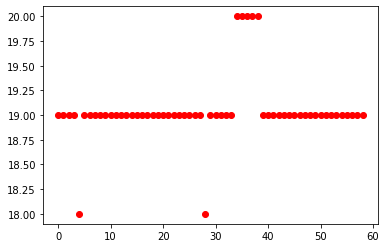

In [12]:
l = list()
for k in range(1,60):
    l.append(knn())
plt.plot(l, "ro")

In [13]:
points_train=[]
labels_train=[]
points_test=[]
labels_test=[]

#extraction  des ligne du csv 
with open("data_4d.csv", "r") as f:
    for lines in f:
        l = lines.strip().split(",")
        for i in range(4):
            l[i] = float(l[i])
        points_train.append((l[0], l[1], l[2], l[3]))
        labels_train.append(l[4].strip())

#On prend 20% de la liste pour l'utiliser en test
yolo = int(len(points_train)*0.2)
for i in range(yolo):
    r = randint(0, len(points_train)-1)
    points_test.append(points_train[r])
    labels_test.append(labels_train[r])
    del points_train[r]
    del labels_train[r]

"""l = list()
for k in range(1,10):
    l.append(knn())
plt.plot(l, "ro")"""
k=5
knn()

375 / 400 = 0.9375


375

30 / 30 = 1.0
30 / 30 = 1.0
30 / 30 = 1.0
30 / 30 = 1.0
30 / 30 = 1.0
30 / 30 = 1.0
30 / 30 = 1.0
30 / 30 = 1.0
30 / 30 = 1.0


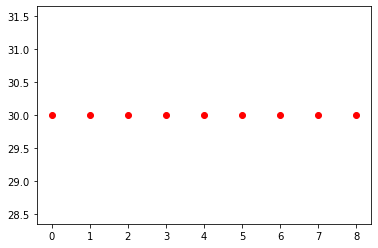

In [14]:
points_train=[]
labels_train=[]
points_test=[]
labels_test=[]

with open("iris.csv", "r") as f:
    for lines in f:
        l = lines.strip().split(",")
        for i in range(4):
            l[i] = float(l[i])
        points_train.append((l[0], l[1], l[2], l[3]))
        labels_train.append(l[4].strip())

n = int(len(points_train)*0.2)
for i in range(n):
    r = randint(0, len(points_train)-1)
    points_test.append(points_train[r])
    labels_test.append(labels_train[r])
    del points_train[r]
    del labels_train[r]

l = list()
for k in range(1,10):
    l.append(knn())
plt.plot(l, "ro")